In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import pandas as pd
from os import listdir
from os.path import isfile, join
import pymc3 as pm
import math as m
import arviz as az

import dive
import matplotlib.pyplot as plt
import deerlab as dl

from theano import tensor as T
from theano.tensor import nlinalg as tnp

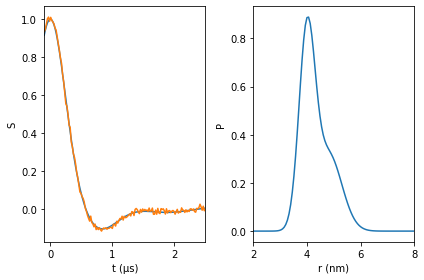

In [3]:
testdata, testpars = dive.generateMultiGauss(nr = 100, nt = 100)

t = testdata['t']
S = testdata['S']
P = testdata['P']
r = testdata['r']
S0 = testdata['S0']

sigma_model = testpars['sigma']


fig, ax = plt.subplots(1,2)
line0 = ax[0].plot(t, S0)
line1 = ax[0].plot(t, S)
line2 = ax[1].plot(r, P)

ax[0].set(xlim = [min(t),max(t)], xlabel = 't (µs)', ylabel = 'S')
ax[1].set(xlim = [min(r),max(r)], xlabel = 'r (nm)', ylabel = 'P')
plt.tight_layout()
plt.show()

In [6]:
def randdelta(P,a0,b0,nr,L):
    a_ = a0 + nr/2
    b_ = b0 + (1/2)*np.linalg.norm(L@P)**2

    delta = pm.Gamma.dist(alpha = a_, beta = b_).random(size = 1)

    return delta[0]

In [4]:
nsamples = 50000

a0 = 0.01
b0 = 1e-6

nr = len(r)

L = dl.regoperator(np.linspace(1,len(r),len(r)), 2)

In [7]:
delta = []

for i in range(nsamples):
    delta.append(randdelta(P, a0, b0, nr, L))

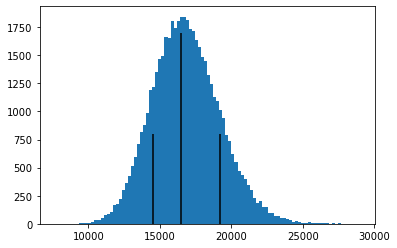

In [8]:
plt.hist(delta,bins = 100)
plt.vlines([14500,16500,19200],[0,0,0],[800, 1700, 800],'k')

debugging the sampler below (compared the norm value and shape of L@P to MATLAB)

In [9]:
np.linalg.norm(L@P)**2

0.005937803180041546

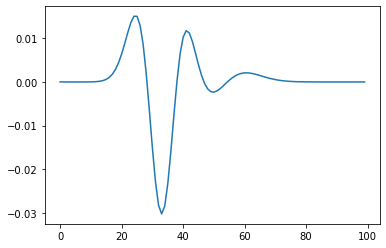

In [12]:
plt.plot(L@P);